In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import sys

import layers as layers
import util as util
import networks as networks

torch.set_default_dtype(torch.float64)

In [2]:
sys.path.insert(0, '../exp/')
import util as util_data

In [61]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)

<module 'networks' from '/Users/beaucoker/Documents/git/VS-BNN/code/horseshoe/networks.py'>

### SIN dataset

In [62]:
n_obs = 100
dim_in = 2
Z, X, Y, sig2 = util_data.load_data('sin', n_obs=n_obs, dim_in=dim_in, seed=0)

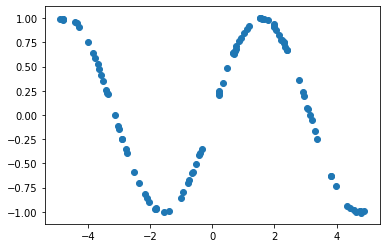

In [63]:
plt.scatter(Z[:,0],Y)

In [64]:
torch.manual_seed(2)
model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2)

In [76]:
torch.manual_seed(2)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
model.reinit_parameters(torch.from_numpy(Z),torch.from_numpy(Y),n_reinit=10) 

In [77]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.0067])
layer_in.lognu_logsig2 tensor([-8.9781])
layer_in.logeta_mu tensor([ 0.0168, -0.0134])
layer_in.logeta_logsig2 tensor([-8.9990, -8.9849])


Epoch[1/1000], kl: 14.743893, likelihood: 78.415550, elbo: 96.748095
Epoch[2/1000], kl: 14.758420, likelihood: 113.035690, elbo: 92.244889
Epoch[3/1000], kl: 14.771227, likelihood: 110.476958, elbo: 96.347024
Epoch[4/1000], kl: 14.786185, likelihood: 102.714817, elbo: 86.472734
Epoch[5/1000], kl: 14.804103, likelihood: 111.904687, elbo: 109.031484
Epoch[6/1000], kl: 14.822507, likelihood: 118.654294, elbo: 93.978077
Epoch[7/1000], kl: 14.839620, likelihood: 116.088593, elbo: 96.305283
Epoch[8/1000], kl: 14.863070, likelihood: 118.369939, elbo: 82.239204
Epoch[9/1000], kl: 14.877778, likelihood: 114.163906, elbo: 103.498116
Epoch[10/1000], kl: 14.896773, likelihood: 108.005612, elbo: 100.047507
Epoch[11/1000], kl: 14.924609, likelihood: 103.975871, elbo: 99.778725
Epoch[12/1000], kl: 14.941671, likelihood: 117.458042, elbo: 85.248091
Epoch[13/1000], kl: 14.964470, likelihood: 117.405302, elbo: 104.742101
Epoch[14/1000], kl: 14.988509, likelihood: 112.642176, elbo: 99.745227
Epoch[15/100

Epoch[117/1000], kl: 16.793994, likelihood: 125.143345, elbo: 108.049485
Epoch[118/1000], kl: 16.802649, likelihood: 125.118978, elbo: 112.011341
Epoch[119/1000], kl: 16.788286, likelihood: 128.223581, elbo: 111.829135
Epoch[120/1000], kl: 16.796528, likelihood: 125.445829, elbo: 107.498777
Epoch[121/1000], kl: 16.794390, likelihood: 131.651104, elbo: 114.559551
Epoch[122/1000], kl: 16.780678, likelihood: 133.666407, elbo: 117.046451
Epoch[123/1000], kl: 16.778287, likelihood: 131.942668, elbo: 113.762112
Epoch[124/1000], kl: 16.804641, likelihood: 130.902321, elbo: 113.125629
Epoch[125/1000], kl: 16.784870, likelihood: 128.874942, elbo: 112.990262
Epoch[126/1000], kl: 16.795436, likelihood: 131.423187, elbo: 116.822142
Epoch[127/1000], kl: 16.786876, likelihood: 127.576312, elbo: 111.409515
Epoch[128/1000], kl: 16.767974, likelihood: 132.535617, elbo: 109.511581
Epoch[129/1000], kl: 16.750930, likelihood: 131.590453, elbo: 114.496705
Epoch[130/1000], kl: 16.739490, likelihood: 131.347

Epoch[231/1000], kl: 15.329748, likelihood: 131.516489, elbo: 117.363884
Epoch[232/1000], kl: 15.331467, likelihood: 131.779544, elbo: 113.990312
Epoch[233/1000], kl: 15.388368, likelihood: 134.464274, elbo: 119.137550
Epoch[234/1000], kl: 15.383325, likelihood: 135.104969, elbo: 121.045080
Epoch[235/1000], kl: 15.368550, likelihood: 135.199528, elbo: 118.538115
Epoch[236/1000], kl: 15.373440, likelihood: 131.795711, elbo: 116.371179
Epoch[237/1000], kl: 15.398277, likelihood: 134.132130, elbo: 118.039468
Epoch[238/1000], kl: 15.376313, likelihood: 133.328714, elbo: 116.438959
Epoch[239/1000], kl: 15.349172, likelihood: 129.958701, elbo: 110.559140
Epoch[240/1000], kl: 15.332454, likelihood: 130.418428, elbo: 116.561060
Epoch[241/1000], kl: 15.338290, likelihood: 133.262604, elbo: 117.242218
Epoch[242/1000], kl: 15.369913, likelihood: 128.300378, elbo: 115.200081
Epoch[243/1000], kl: 15.360426, likelihood: 132.220018, elbo: 116.948577
Epoch[244/1000], kl: 15.371914, likelihood: 133.260

Epoch[345/1000], kl: 14.917865, likelihood: 132.355215, elbo: 119.469139
Epoch[346/1000], kl: 14.923659, likelihood: 133.571116, elbo: 118.949166
Epoch[347/1000], kl: 14.921036, likelihood: 131.721792, elbo: 112.857443
Epoch[348/1000], kl: 14.901200, likelihood: 135.910722, elbo: 119.079198
Epoch[349/1000], kl: 14.895102, likelihood: 134.850051, elbo: 120.031546
Epoch[350/1000], kl: 14.904632, likelihood: 130.315614, elbo: 116.085858
Epoch[351/1000], kl: 14.890497, likelihood: 134.530581, elbo: 119.046100
Epoch[352/1000], kl: 14.872286, likelihood: 132.210284, elbo: 117.579792
Epoch[353/1000], kl: 14.865281, likelihood: 126.256397, elbo: 117.146639
Epoch[354/1000], kl: 14.874121, likelihood: 134.861818, elbo: 118.737013
Epoch[355/1000], kl: 14.845261, likelihood: 130.651063, elbo: 115.156590
Epoch[356/1000], kl: 14.829551, likelihood: 132.693166, elbo: 113.973899
Epoch[357/1000], kl: 14.797290, likelihood: 131.445993, elbo: 117.198919
Epoch[358/1000], kl: 14.780782, likelihood: 134.460

Epoch[458/1000], kl: 14.506556, likelihood: 135.401701, elbo: 121.212367
Epoch[459/1000], kl: 14.485316, likelihood: 119.116441, elbo: 115.771592
Epoch[460/1000], kl: 14.500639, likelihood: 136.275322, elbo: 119.929238
Epoch[461/1000], kl: 14.473814, likelihood: 124.399804, elbo: 115.621043
Epoch[462/1000], kl: 14.491197, likelihood: 134.163807, elbo: 119.781452
Epoch[463/1000], kl: 14.488814, likelihood: 124.805950, elbo: 114.192504
Epoch[464/1000], kl: 14.490563, likelihood: 132.214762, elbo: 118.097892
Epoch[465/1000], kl: 14.531948, likelihood: 134.183606, elbo: 119.721180
Epoch[466/1000], kl: 14.522386, likelihood: 131.433957, elbo: 118.878570
Epoch[467/1000], kl: 14.516252, likelihood: 127.589709, elbo: 113.070927
Epoch[468/1000], kl: 14.490401, likelihood: 131.272539, elbo: 119.788686
Epoch[469/1000], kl: 14.483697, likelihood: 131.167161, elbo: 118.065731
Epoch[470/1000], kl: 14.478700, likelihood: 135.228800, elbo: 115.200229
Epoch[471/1000], kl: 14.476343, likelihood: 133.038

Epoch[571/1000], kl: 14.256459, likelihood: 136.350173, elbo: 119.806405
Epoch[572/1000], kl: 14.242893, likelihood: 126.413225, elbo: 117.164819
Epoch[573/1000], kl: 14.253400, likelihood: 129.213722, elbo: 120.465795
Epoch[574/1000], kl: 14.263045, likelihood: 133.564226, elbo: 119.507481
Epoch[575/1000], kl: 14.270200, likelihood: 134.132696, elbo: 114.810745
Epoch[576/1000], kl: 14.268303, likelihood: 122.875867, elbo: 112.336690
Epoch[577/1000], kl: 14.262796, likelihood: 131.778263, elbo: 119.496670
Epoch[578/1000], kl: 14.271253, likelihood: 133.051622, elbo: 118.328663
Epoch[579/1000], kl: 14.269453, likelihood: 130.461223, elbo: 121.892718
Epoch[580/1000], kl: 14.264030, likelihood: 132.976127, elbo: 118.463661
Epoch[581/1000], kl: 14.248608, likelihood: 132.166530, elbo: 111.920042
Epoch[582/1000], kl: 14.269135, likelihood: 132.918203, elbo: 118.747570
Epoch[583/1000], kl: 14.258450, likelihood: 124.206117, elbo: 99.910537
Epoch[584/1000], kl: 14.249815, likelihood: 132.5212

Epoch[684/1000], kl: 14.250509, likelihood: 129.099347, elbo: 117.369553
Epoch[685/1000], kl: 14.283084, likelihood: 127.611211, elbo: 118.047396
Epoch[686/1000], kl: 14.274231, likelihood: 135.033890, elbo: 120.953773
Epoch[687/1000], kl: 14.279092, likelihood: 131.057839, elbo: 116.567120
Epoch[688/1000], kl: 14.281479, likelihood: 130.934618, elbo: 118.816321
Epoch[689/1000], kl: 14.278142, likelihood: 134.329855, elbo: 120.225450
Epoch[690/1000], kl: 14.302618, likelihood: 130.141083, elbo: 117.631443
Epoch[691/1000], kl: 14.293645, likelihood: 133.310093, elbo: 116.193662
Epoch[692/1000], kl: 14.307926, likelihood: 126.284881, elbo: 113.840161
Epoch[693/1000], kl: 14.287016, likelihood: 130.341109, elbo: 115.464636
Epoch[694/1000], kl: 14.276215, likelihood: 126.270281, elbo: 118.457000
Epoch[695/1000], kl: 14.282158, likelihood: 133.615817, elbo: 119.552271
Epoch[696/1000], kl: 14.281393, likelihood: 133.661248, elbo: 119.253637
Epoch[697/1000], kl: 14.289816, likelihood: 134.402

Epoch[798/1000], kl: 14.212275, likelihood: 135.518405, elbo: 113.620625
Epoch[799/1000], kl: 14.240654, likelihood: 136.910231, elbo: 119.348656
Epoch[800/1000], kl: 14.230965, likelihood: 127.027820, elbo: 105.249939
Epoch[801/1000], kl: 14.212023, likelihood: 132.985329, elbo: 100.260141
Epoch[802/1000], kl: 14.202269, likelihood: 135.039759, elbo: 120.071596
Epoch[803/1000], kl: 14.216296, likelihood: 130.927514, elbo: 116.257589
Epoch[804/1000], kl: 14.199019, likelihood: 134.305868, elbo: 118.531960
Epoch[805/1000], kl: 14.201565, likelihood: 130.508362, elbo: 120.431698
Epoch[806/1000], kl: 14.223676, likelihood: 131.075005, elbo: 111.123004
Epoch[807/1000], kl: 14.213775, likelihood: 126.140200, elbo: 109.127875
Epoch[808/1000], kl: 14.189544, likelihood: 134.000035, elbo: 118.990637
Epoch[809/1000], kl: 14.243009, likelihood: 131.619969, elbo: 105.381700
Epoch[810/1000], kl: 14.238267, likelihood: 134.984287, elbo: 120.700660
Epoch[811/1000], kl: 14.230872, likelihood: 125.447

Epoch[911/1000], kl: 14.274943, likelihood: 129.429104, elbo: 116.908195
Epoch[912/1000], kl: 14.272459, likelihood: 133.281197, elbo: 119.854658
Epoch[913/1000], kl: 14.283937, likelihood: 122.571844, elbo: 117.729300
Epoch[914/1000], kl: 14.284928, likelihood: 119.867863, elbo: 111.435946
Epoch[915/1000], kl: 14.293140, likelihood: 130.953416, elbo: 117.426581
Epoch[916/1000], kl: 14.282536, likelihood: 134.687252, elbo: 115.833578
Epoch[917/1000], kl: 14.264893, likelihood: 134.682836, elbo: 117.021520
Epoch[918/1000], kl: 14.251253, likelihood: 134.309684, elbo: 118.997414
Epoch[919/1000], kl: 14.261433, likelihood: 135.124931, elbo: 114.804784
Epoch[920/1000], kl: 14.245842, likelihood: 132.183110, elbo: 117.267708
Epoch[921/1000], kl: 14.250835, likelihood: 134.971126, elbo: 115.883716
Epoch[922/1000], kl: 14.237827, likelihood: 131.637227, elbo: 120.246145
Epoch[923/1000], kl: 14.240172, likelihood: 126.957335, elbo: 110.605024
Epoch[924/1000], kl: 14.253155, likelihood: 133.808

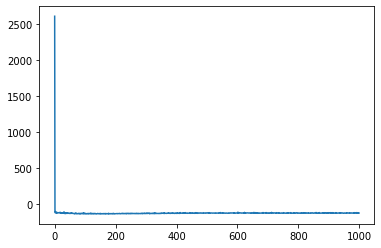

In [78]:
elbo = -networks.train(model, optimizer, torch.from_numpy(Z), torch.from_numpy(Y), n_epochs=1000, n_rep_opt=100, print_freq=1)
plt.plot(-elbo)

In [103]:
def plot_slice(model, x, y, dim=0, x_plot=None, x_plot_slice=0.0, n_samp=500, ax=None):
    with torch.no_grad():
    
        if ax is None:
            fig, ax = plt.subplots()
        dim_in = model.dim_in

        if x_plot is None:
            x_plot = torch.linspace(x.min(),x.max(),100)
            
        if type(x) is not np.ndarray:
            x = x.numpy()
            
        if type(y) is not np.ndarray:
            y = y.numpy()

        xx = x_plot_slice*torch.ones(x_plot.shape[0], dim_in)
        xx[:,dim] = x_plot.reshape(-1)

        f_pred_plot = model(xx, sample_input_layer=False, weights_type='mean').numpy() # posterior mean

        ax.scatter(x[:,dim], y) # training data
        ax.plot(xx[:,dim], f_pred_plot) # posterior mean

        # uncertainty
        f_samp_plot = np.zeros((n_samp, x_plot.shape[0]))
        for i in range(n_samp):
            f_samp_plot[i,:] = model(xx, sample_input_layer=True, weights_type='sample').numpy().reshape(-1)

        for q in [.025, .05, .1]:
            ci = np.quantile(f_samp_plot, [q, 1-q], axis=0)
            ax.fill_between(xx[:,0].reshape(-1), ci[0,:], ci[1,:], alpha=.1, color='blue')

            
def plot_slices(model, x, y, x_plot=None, x_plot_slice=0.0, n_samp=500, figsize=(4,4)):
    fig, ax = plt.subplots(1,model.dim_in, figsize=figsize, sharey=True)
    ax[0].set_ylabel('y')
    fig.suptitle("Posterior predictive (1d slices)")
    for dim in range(model.dim_in):
        plot_slice(model, x, y, dim, x_plot, x_plot_slice, n_samp, ax=ax[dim])
        ax[dim].set_xlabel('x'+str(dim))
    return fig, ax


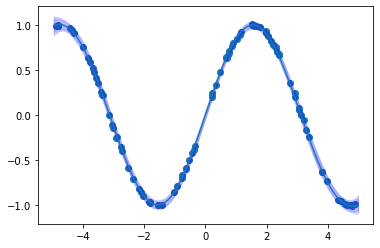

In [80]:
plot_slice(model, Z, Y, dim=0)

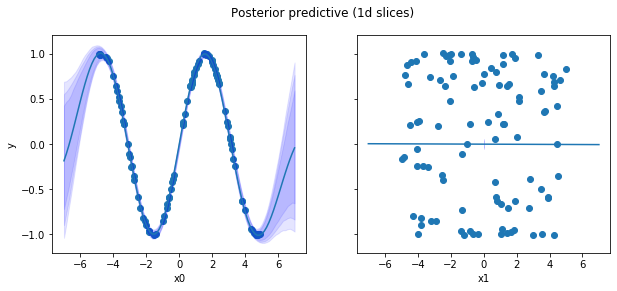

In [104]:
fig, ax = plot_slices(model, Z, Y, x_plot=torch.linspace(-7,7,100).reshape(-1,1), figsize=(10,4))

In [83]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.7511])
layer_in.lognu_logsig2 tensor([-10.3399])
layer_in.logeta_mu tensor([ 0.0306, -5.5138])
layer_in.logeta_logsig2 tensor([-10.3348,  -0.7281])


In [93]:
with torch.no_grad():
    mu = model.layer_in.logeta_mu
    sig2 = model.layer_in.logeta_logsig2.exp()

    mean = torch.exp(mu + sig2/2)
    var = (torch.exp(sig2)-1)*torch.exp(2*mu+sig2)

In [89]:
mean

tensor([1.0311, 0.0051])

In [90]:
var

tensor([3.4538e-05, 1.6342e-05])

Text(0, 0.5, 'horseshoe parameter (for variable selection)')

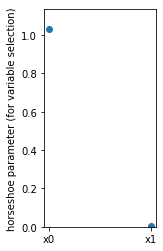

In [112]:
fig, ax = plt.subplots(figsize=(2,4))
ax.errorbar(np.arange(model.dim_in), mean.detach(), yerr=var.detach(), fmt='o')
ax.set_ylim(0,1.1*mean.max())
ax.set_xticks(np.arange(model.dim_in))
ax.set_xticklabels(['x'+str(z) for z in range(dim_in)])
ax.set_ylabel('horseshoe parameter (for variable selection)')

#### GPy for comparison

In [29]:
import GPy
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.)

In [30]:
m = GPy.models.GPRegression(Z,Y,kernel)

m.Gaussian_noise.variance = sig2
m.Gaussian_noise.fix()
m.optimize_restarts(num_restarts = 10, verbose=False)

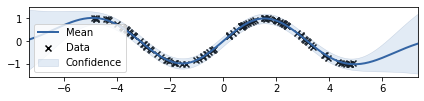

In [41]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

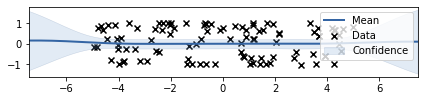

In [42]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')